In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import sklearn.model_selection as model_selection
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# Method to find missing value percentage 
def missing_percent(df):
    return (df.isnull().sum() * 100/ len(df))

#Method to impute missing values and create missing value indicator column
def imputer_with_indicator(df):
    # Get the columns with missing values
    cols_with_missing = (col for col in df.columns if df[col].isnull().any())
    # Create new binary columns from the columns with missing values
    for col in cols_with_missing:
        df[col + '_missing'] = df[col].isnull()
    # Keep the column names
    column_names=df.columns
    # Impute the dataframe
    my_imputer = SimpleImputer()
    df = pd.DataFrame(my_imputer.fit_transform(df.values))
    # Add the column names of the original data
    df.columns = column_names
    return df

In [3]:
#Read the dataset
data = pd.read_csv("C:/Users/VineetJ/Downloads/PHY_TRAIN.csv")
data

,exampleid,target,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,...,feat69,feat70,feat71,feat72,feat73,feat74,feat75,feat76,feat77,feat78
0,1,0,0.000000,0.000000,0.000000,0,0.000000,0.0,0.000000,0,...,-1,-0.036906,-0.000724,0.000000,0.000000,0.000000,0,0,0.000000,0.000000
1,2,0,0.920167,0.817883,-0.646473,-1,0.000000,0.0,0.000000,0,...,-1,-0.999927,-0.012102,0.920167,0.817883,-0.646473,-1,1,0.302235,0.950770
2,3,1,0.868397,0.178202,0.150828,-1,0.000000,0.0,0.000000,0,...,1,0.908824,0.550843,0.868397,0.178202,0.150828,-1,1,0.001421,0.882853
3,4,0,0.000000,0.000000,0.000000,0,1.577894,0.0,-0.369792,-1,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000
4,5,0,0.000000,0.000000,0.000000,0,0.000000,0.0,0.000000,0,...,1,0.000005,0.400702,0.000000,0.000000,0.000000,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,0,0.000000,0.000000,0.000000,0,0.000000,0.0,0.000000,0,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000
49996,49997,1,0.000000,0.000000,0.000000,0,0.000000,0.0,0.000000,0,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000
49997,49998,1,0.918590,1.012605,-0.047045,-1,0.000000,0.0,0.000000,0,...,0,0.000000,0.000000,0.918590,1.012605,-0.047045,-1,1,0.014583,0.850662
49998,49999,1,0.000000,0.000000,0.000000,0,0.855551,0.0,-0.849437,1,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000


In [4]:
pd.set_option("max_rows", None)
# Summary statistics for all variables
data.agg([missing_percent, 'mean', 'std', 'min', 'max', 'skew']).T

,missing_percent,mean,std,min,max,skew
exampleid,0.000,25000.500000,14433.901067,1.000000,50000.000000,0.000000
target,0.000,0.497220,0.499997,0.000000,1.000000,0.011121
feat1,0.000,0.155606,0.414875,0.000000,2.639020,2.826244
feat2,0.000,0.084876,0.295335,0.000000,3.429590,4.424666
feat3,0.000,-0.050354,0.253748,-1.000000,0.999954,-1.562475
feat4,0.000,-0.000060,0.392916,-1.000000,1.000000,-0.000531
feat5,0.000,0.126569,0.400694,0.000000,2.719006,3.245044
feat6,0.000,0.049887,0.223713,0.000000,3.054644,5.761064
feat7,0.000,-0.038344,0.214168,-1.000000,0.999274,-2.226074
feat8,0.000,0.002860,0.322077,-1.000000,1.000000,0.058966


In [5]:
pd.reset_option("max_rows")

In [6]:
# Columns with missing values
data.columns[data.isna().any()].tolist()

['feat20',
 'feat21',
 'feat22',
 'feat29',
 'feat44',
 'feat45',
 'feat46',
 'feat55']

In [7]:
data_cpy = data.copy()
# Missing value indicator column and missing value imputation 
data_cpy = imputer_with_indicator(data_cpy)

In [8]:
data_cpy.columns[data_cpy.isna().any()].tolist()

[]

In [9]:
data_cpy.describe()

,exampleid,target,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,...,feat77,feat78,feat20_missing,feat21_missing,feat22_missing,feat29_missing,feat44_missing,feat45_missing,feat46_missing,feat55_missing
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,0.497220,0.155606,0.084876,-0.050354,-0.000060,0.126569,0.049887,-0.038344,0.002860,...,0.002843,0.066545,0.684040,0.684040,0.684040,0.601240,0.289380,0.289380,0.289380,0.372040
std,14433.901067,0.499997,0.414875,0.295335,0.253748,0.392916,0.400694,0.223713,0.214168,0.322077,...,0.019081,0.223091,0.464902,0.464902,0.464902,0.489648,0.453479,0.453479,0.453479,0.483354
min,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12500.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25000.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,37500.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,50000.000000,1.000000,2.639020,3.429590,0.999954,1.000000,2.719006,3.054644,0.999274,1.000000,...,0.385513,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
X=data_cpy.loc[:, data_cpy.columns != 'target']
y=data_cpy['target']

In [11]:
# Finding important features
cols = list(X.columns)
featureImportance = pd.DataFrame()
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    # Compare p-value with threshold value to distinguish important features
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        featureImportance = pd.DataFrame(p)
        break
# List of important features        
selected_features_BE = cols
print(selected_features_BE)
featureImportance = featureImportance.reset_index()
featureImportance.columns = ['feature','pValue']
featureImportance.sort_values('pValue',inplace=True)
featureImportance = featureImportance.reset_index(drop=True)
featureImportance

['feat4', 'feat8', 'feat12', 'feat13', 'feat14', 'feat15', 'feat20', 'feat31', 'feat40', 'feat42', 'feat56', 'feat63', 'feat66', 'feat69', 'feat70', 'feat71', 'feat75']


,feature,pValue
0,feat13,0.000000e+00
1,feat14,5.520442e-259
2,feat4,2.449933e-236
3,feat75,3.486931e-203
4,feat8,5.355642e-110
5,feat71,3.710408e-82
6,feat66,2.198360e-59
7,feat15,5.556260e-55
8,feat20,9.659057e-15
9,feat63,1.282215e-13


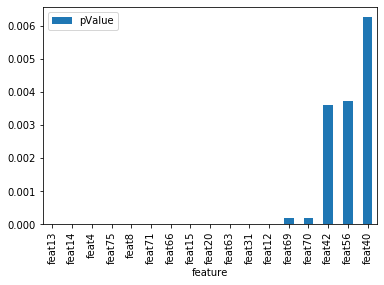

In [12]:
featureImportance.plot(kind='bar',y='pValue',x='feature')

In [13]:
XL1 = X[selected_features_BE]

In [14]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(XL1, y, test_size=0.20, random_state=0)

In [15]:
# Logistic Regression
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
y_pred = logreg.predict(X_test)
logreg.score(X_test, y_test)

0.7063

In [17]:
# Performance metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report")
print(classification_report(y_test, y_pred))

Accuracy: 0.7063
Precision: 0.7061824117527036
Confusion Matrix:
[[3602 1440]
 [1497 3461]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.71      0.71      0.71      5042
         1.0       0.71      0.70      0.70      4958

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



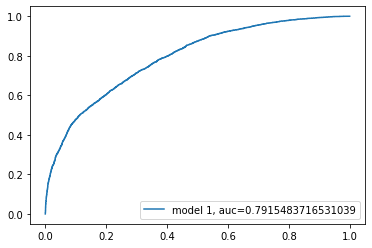

In [18]:
# AUC of ROC
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="model 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [19]:
# Baseline the logistic regression result
baseline = logreg.score(X_test, y_test)
features = selected_features_BE
regression = LogisticRegression(max_iter=200)

In [20]:
# Selecting important interaction terms
interactions = list()
for f_A in features:
    for f_B in features:
        if f_A > f_B:
            X_train['interaction'] = X_train[f_A] * X_train[f_B]
            X_test['interaction'] = X_test[f_A]* X_test[f_B]
            regression.fit(X_train, y_train)
            y_pred=regression.predict(X_test)
            acc=metrics.accuracy_score(y_pred, y_test)
            # Compare accuracy with baseline value to select important interaction terms 
            if acc > baseline:
                interactions.append((f_A, f_B, round(acc,4)))

C:\Users\VineetJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\VineetJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\VineetJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [21]:
# Sort interaction terms by accuracy
d = pd.DataFrame(interactions)
d.sort_values(by=2)

,0,1,2
27,feat75,feat69,0.7064
2,feat13,feat12,0.7064
3,feat14,feat13,0.7064
5,feat31,feat12,0.7064
22,feat70,feat14,0.7064
20,feat69,feat42,0.7064
19,feat69,feat31,0.7064
10,feat63,feat13,0.7064
18,feat69,feat20,0.7064
12,feat63,feat20,0.7064


In [22]:
# Add four interaction terms with highest accuracy
XL2 = XL1.copy()
XL2['newcol1']=XL2['feat75'] * XL2['feat12']
XL2['newcol2']=XL2['feat4'] * XL2['feat12']
XL2['newcol3']=XL2['feat42'] * XL2['feat31']
XL2['newcol4']=XL2['feat66'] * XL2['feat12']

In [23]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(XL2, y, test_size=0.20, random_state=0)

In [24]:
# Logistic Regression with interaction terms
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_pred = logreg.predict(X_test)
logreg.score(X_test, y_test)

0.7069

In [26]:
# Performance metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report")
print(classification_report(y_test, y_pred))

Accuracy: 0.7069
Precision: 0.7069634470083724
Confusion Matrix:
[[3607 1435]
 [1496 3462]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.71      0.72      0.71      5042
         1.0       0.71      0.70      0.70      4958

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



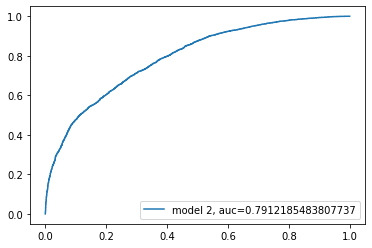

In [27]:
# AUC of ROC
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="model 2, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [28]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=0)

In [29]:
# Random Forest
regressor = RandomForestClassifier(n_estimators=500, random_state=123)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
regressor.score(X_test, y_test)

0.7187

In [30]:
# Performance metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report")
print(classification_report(y_test, y_pred))

Accuracy: 0.7187
Precision: 0.7259321676848536
Confusion Matrix:
[[3741 1301]
 [1512 3446]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.71      0.74      0.73      5042
         1.0       0.73      0.70      0.71      4958

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



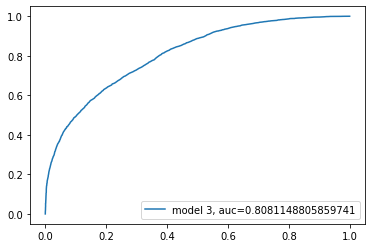

In [31]:
# AUC of ROC
y_pred_proba = regressor.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="model 3, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [32]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=0)

In [33]:
# Gradient Boosting
gb_clf2 = GradientBoostingClassifier(n_estimators=1000, random_state=123)
gb_clf2.fit(X_train, y_train)
y_pred = gb_clf2.predict(X_test)
gb_clf2.score(X_test, y_test)

0.731

In [34]:
# Performance metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report")
print(classification_report(y_test, y_pred))

Accuracy: 0.731
Precision: 0.7327586206896551
Confusion Matrix:
[[3740 1302]
 [1388 3570]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.73      0.74      0.74      5042
         1.0       0.73      0.72      0.73      4958

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



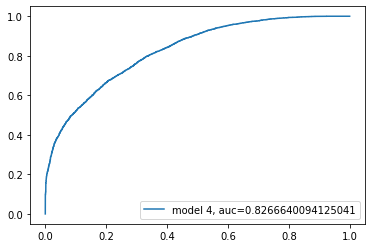

In [35]:
# AUC of ROC
y_pred_proba = gb_clf2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="model 4, auc="+str(auc))
plt.legend(loc=4)
plt.show()